In [7]:
import pandas as pd

weather_data = pd.read_csv('data_weather.csv')

print(weather_data.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


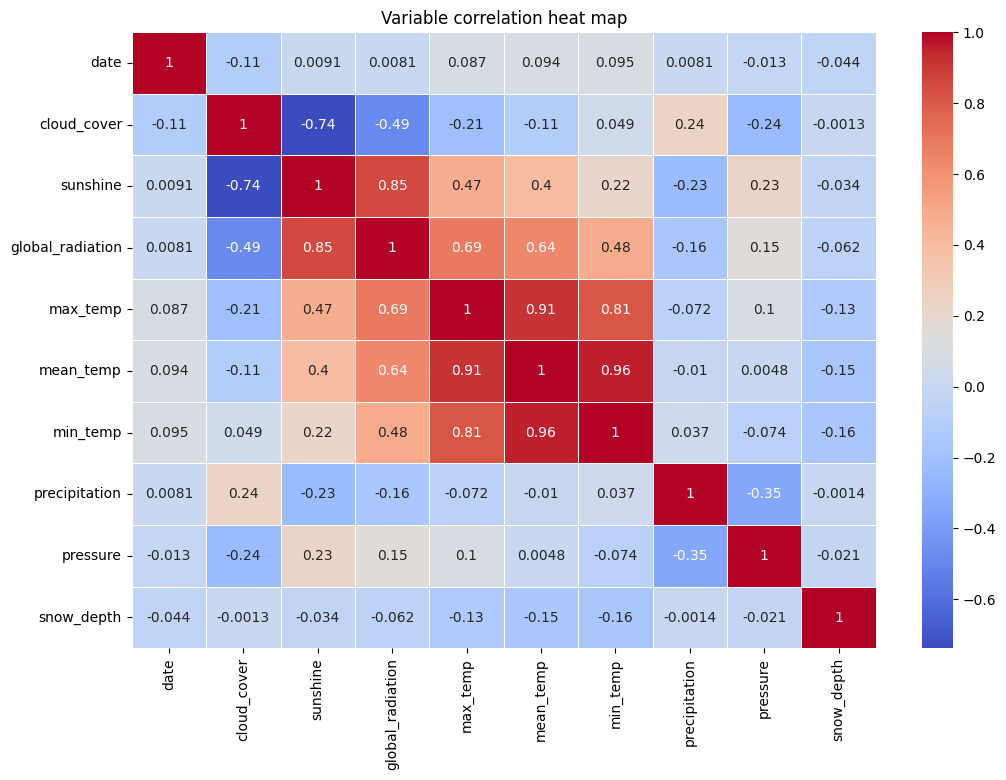

In [8]:
import seaborn as sns

corr_matrix = weather_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Variable correlation heat map')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6952\2519747322.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


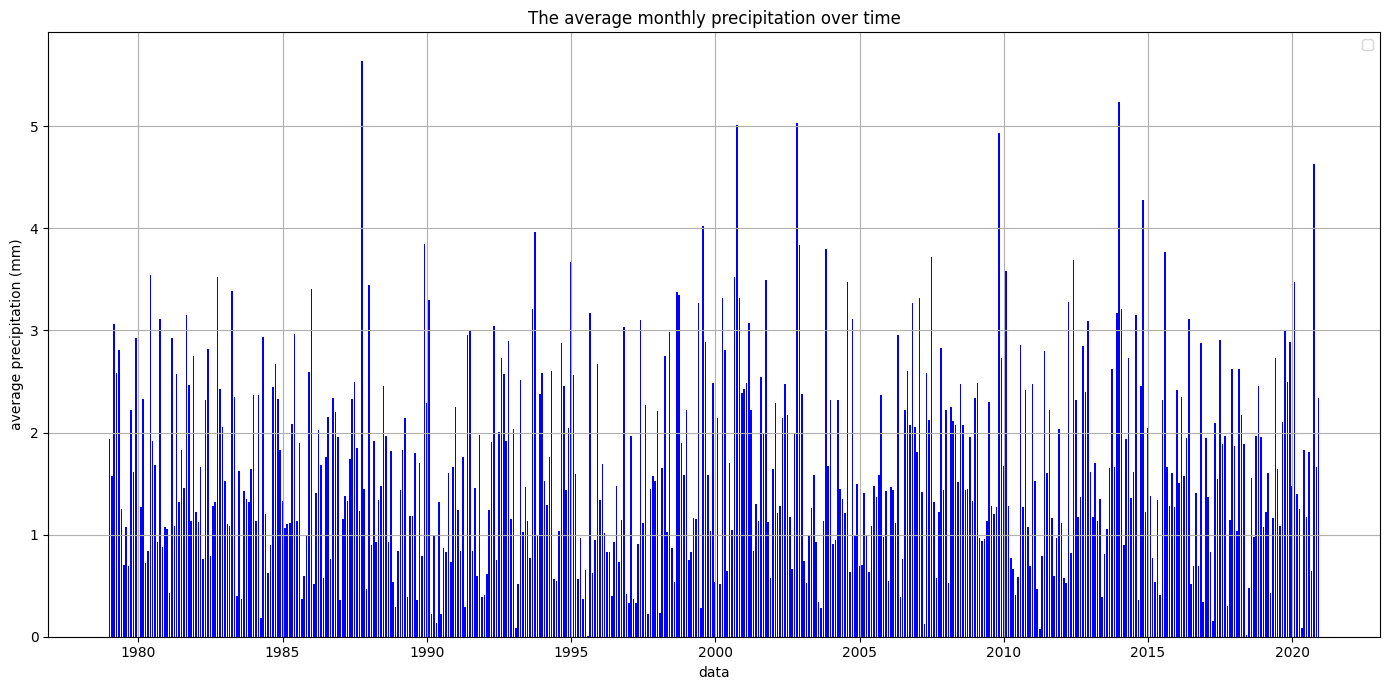

In [10]:
import matplotlib.pyplot as plt

weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y%m%d')


weather_data['year_month'] = weather_data['date'].dt.to_period('M')
monthly_precipitation = weather_data.groupby('year_month')['precipitation'].mean().reset_index()

monthly_precipitation['year_month'] = monthly_precipitation['year_month'].dt.to_timestamp()


plt.figure(figsize=(14, 7))
plt.bar(monthly_precipitation['year_month'], monthly_precipitation['precipitation'], color='blue', width=20)
plt.xlabel('data')
plt.ylabel('average precipitation (mm)')
plt.title('The average monthly precipitation over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

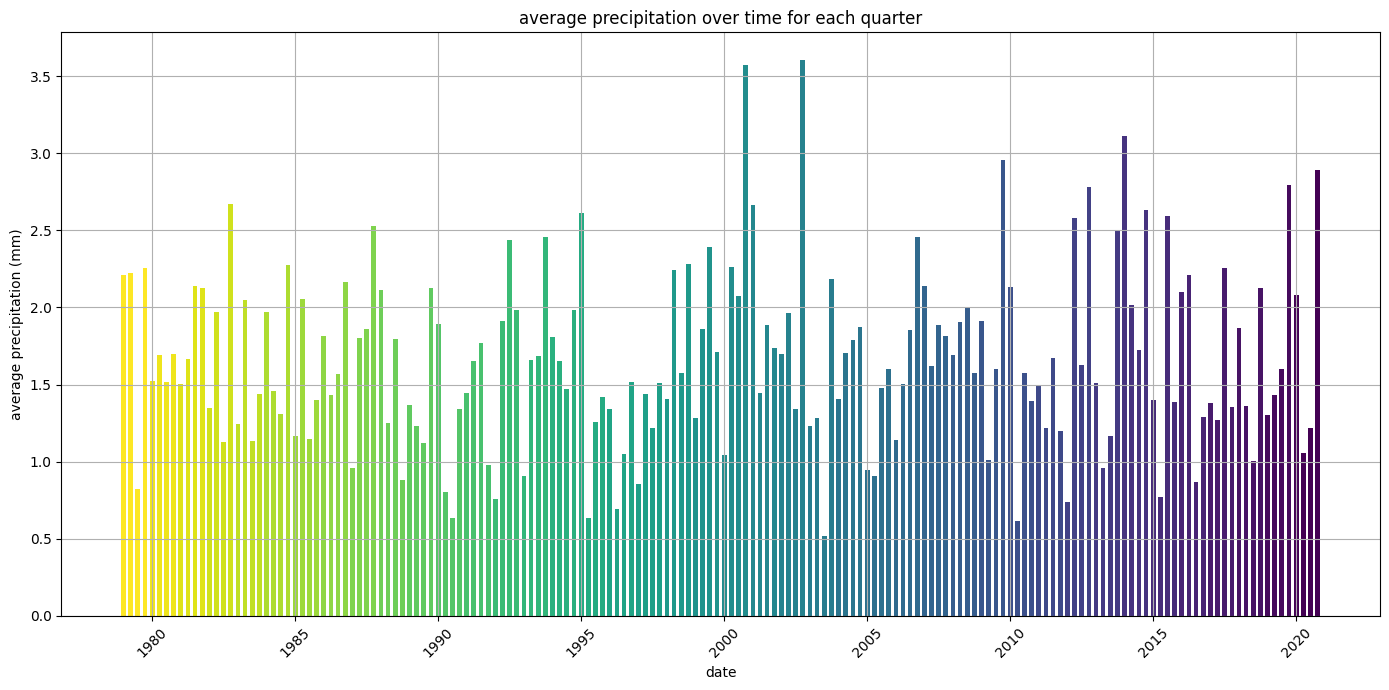

In [24]:
import numpy as np

weather_data['year_quarter'] = weather_data['date'].dt.to_period('Q')
quarterly_precipitation = weather_data.groupby('year_quarter')['precipitation'].mean().reset_index()

quarterly_precipitation['year_quarter'] = quarterly_precipitation['year_quarter'].dt.to_timestamp()

quarterly_precipitation['year'] = quarterly_precipitation['year_quarter'].dt.year

plt.figure(figsize=(14, 7))


years = quarterly_precipitation['year'].unique()
colors = plt.cm.viridis_r(np.linspace(0, 1, len(years)))

for i, year in enumerate(years):
    data = quarterly_precipitation[quarterly_precipitation['year'] == year]
    plt.bar(data['year_quarter'], data['precipitation'], color=colors[i], label=str(year), width=60)

plt.xlabel('date')
plt.ylabel('average precipitation (mm)')
plt.title('average precipitation over time for each quarter')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


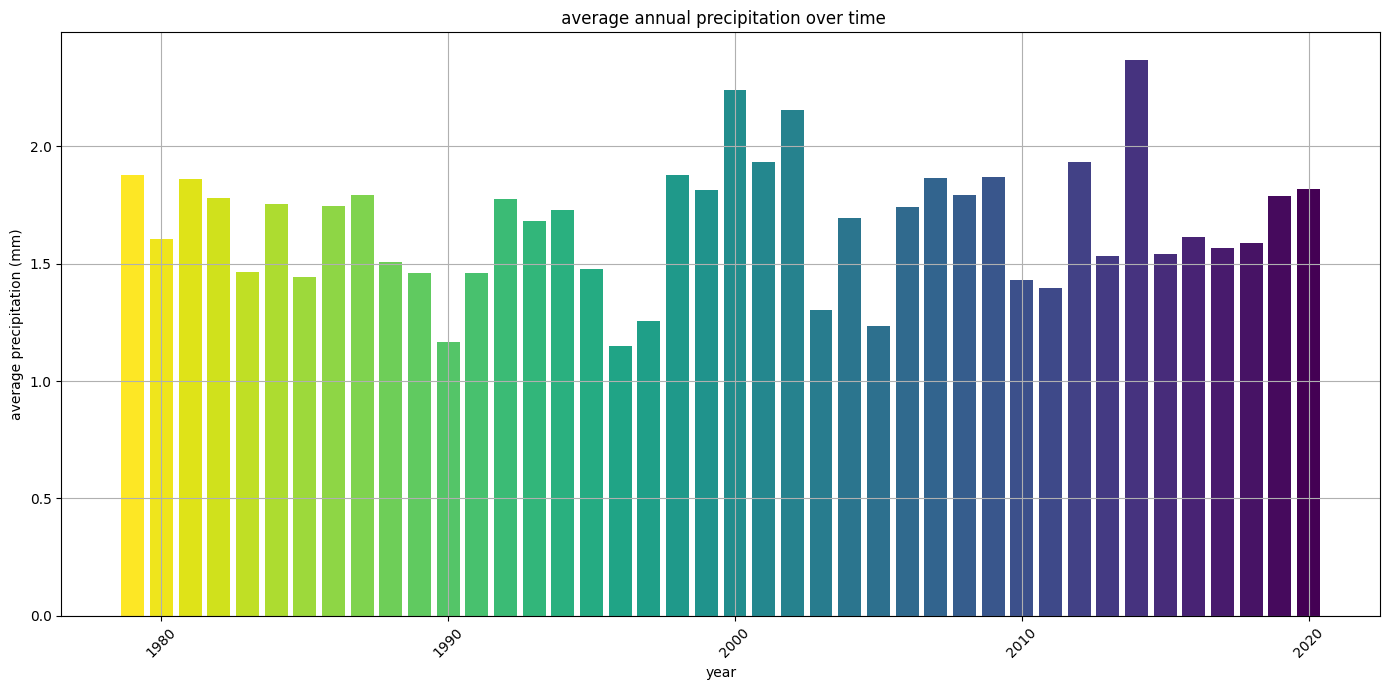

In [23]:
weather_data['year'] = weather_data['date'].dt.year
annual_precipitation = weather_data.groupby('year')['precipitation'].mean().reset_index()

plt.figure(figsize=(14, 7))
colors = plt.cm.viridis_r(np.linspace(0, 1, len(annual_precipitation)))

plt.bar(annual_precipitation['year'], annual_precipitation['precipitation'], color=colors, width=0.8)
plt.xlabel('year')
plt.ylabel('average precipitation (mm)')
plt.title(' average annual precipitation over time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

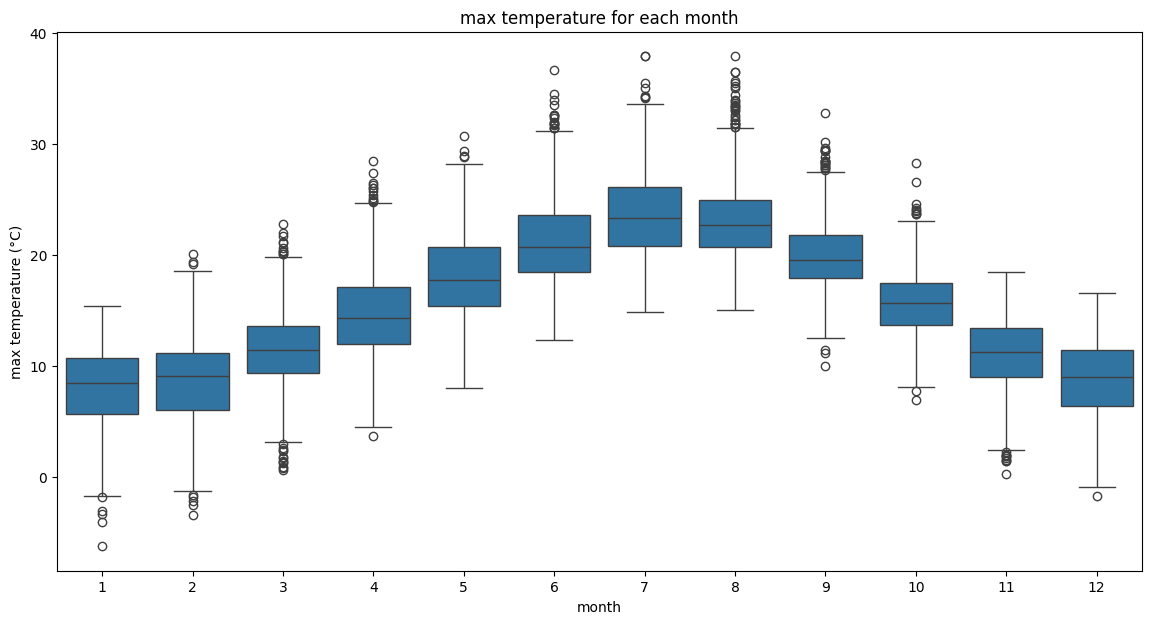

In [29]:

plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='max_temp', data=weather_data)
plt.xlabel('month')
plt.ylabel('max temperature (°C)')
plt.title('max temperature for each month')
plt.show()

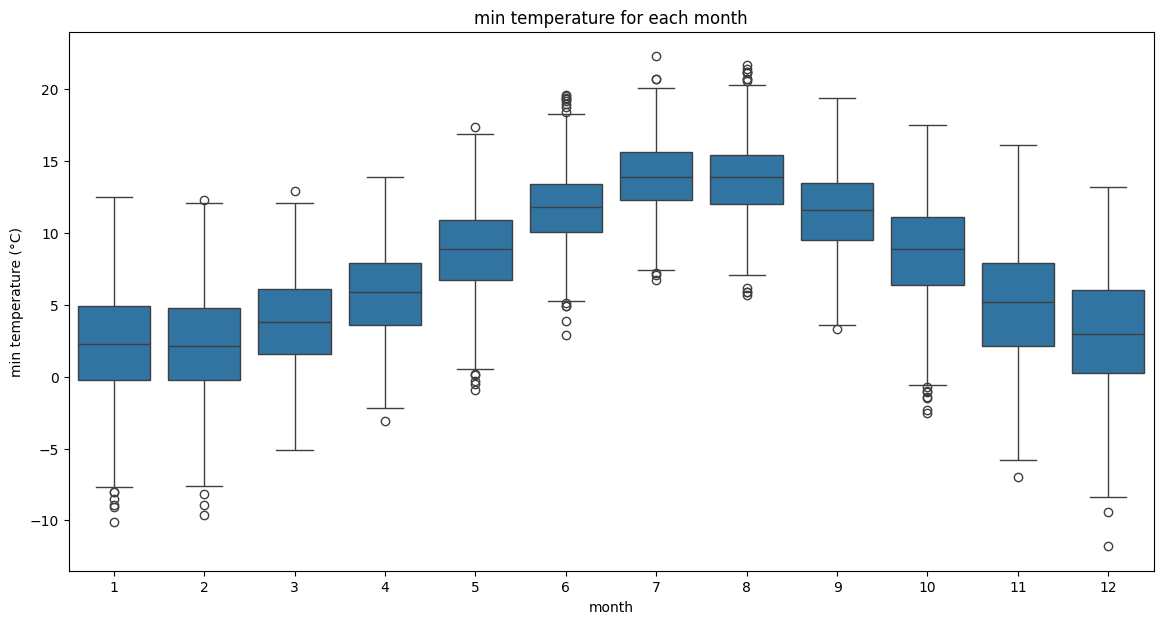

In [30]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='min_temp', data=weather_data)
plt.xlabel('month')
plt.ylabel('min temperature (°C)')
plt.title('min temperature for each month')
plt.show()

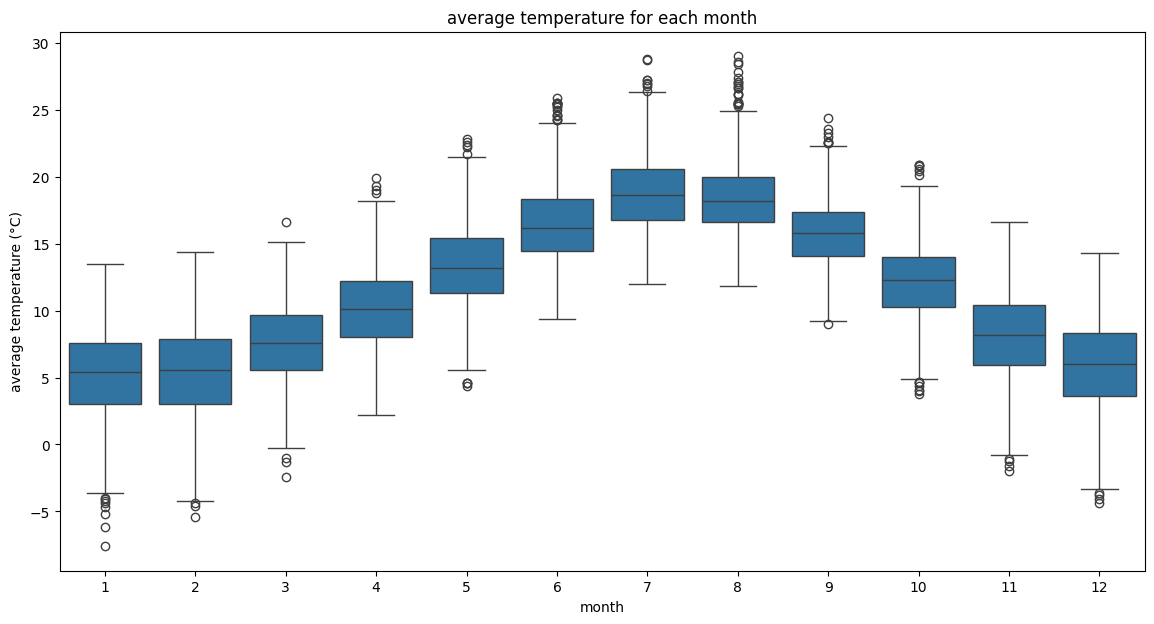

In [28]:
weather_data['month'] = weather_data['date'].dt.month


plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='mean_temp', data=weather_data)
plt.xlabel('month')
plt.ylabel('average temperature (°C)')
plt.title('average temperature for each month')
plt.show()